In [43]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import datetime
import numpy as np

import seaborn as sns
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('seaborn')

In [60]:
df = pd.read_csv("/Users/nialdaly/Documents/ey_nextwave/data/data_train.csv", index_col=False)

# drops the first (unneccessary column)
df = df.drop(df.columns[0], axis=1)

In [62]:
df.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07


In [64]:
# creates a datetime column for the time entry column
df['time_entry_dt'] = pd.to_datetime(df['time_entry'])

# creates a datetime column for the time exit column
df['time_exit_dt'] = pd.to_datetime(df['time_exit'])

df.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,time_entry_dt,time_exit_dt
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,2019-04-08 07:04:31,2019-04-08 07:08:32
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,2019-04-08 07:20:34,2019-04-08 07:25:42
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,2019-04-08 07:53:32,2019-04-08 08:03:25
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,2019-04-08 08:17:50,2019-04-08 08:37:23
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,2019-04-08 14:38:09,2019-04-08 14:38:09


In [65]:
# displays the datatypes present
df.dtypes

hash                     object
trajectory_id            object
time_entry               object
time_exit                object
vmax                    float64
vmin                    float64
vmean                   float64
x_entry                 float64
y_entry                 float64
x_exit                  float64
y_exit                  float64
time_entry_dt    datetime64[ns]
time_exit_dt     datetime64[ns]
dtype: object

## Encoding Cyclical Features

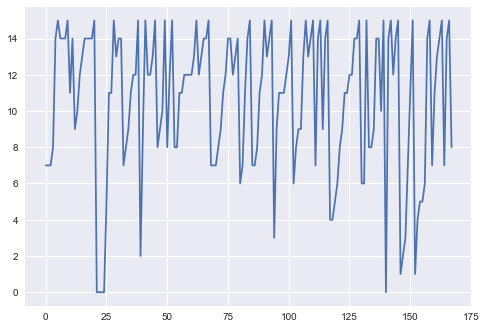

In [70]:
# 
df['time_entry_dt_hr'] = df.time_entry_dt.dt.hour

# roughly the first week of the data
entry_sample = df[:168] 

# plots the
ax = entry_sample['time_entry_dt_hr'].plot()

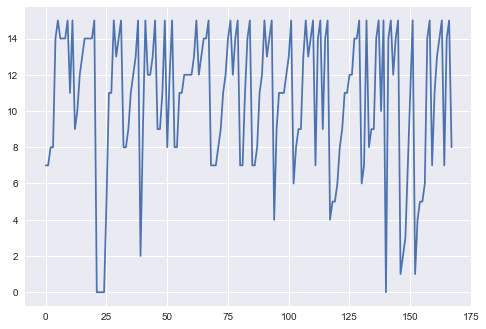

In [75]:
# 
df['time_exit_dt_hr'] = df.time_exit_dt.dt.hour

# roughly the first week of the data
exit_sample = df[:168] 

# plots the
ax = exit_sample['time_exit_dt_hr'].plot()

In [76]:
df.loc[df['time_entry_dt_hr'] == 23]

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,time_entry_dt,time_exit_dt,time_exit_dt_hr,time_entry_dt_hr


In [10]:
#Converting time to datetime object
df_time_entry_convert = pd.to_datetime(df['time_entry'], format='%H:%M:%S').dt.time
df['time_entry_dt'] = df_time_entry_convert

df_time_exit_convert = pd.to_datetime(df['time_exit'], format='%H:%M:%S').dt.time
df['time_exit_dt'] = df_time_exit_convert

In [15]:
df.head()

,hash,trajectory_id,time_entry,time_exit,vmax,vmin,vmean,x_entry,y_entry,x_exit,y_exit,time_entry_dt,time_exit_dt
0,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_0,07:04:31,07:08:32,NaN,NaN,NaN,3.751014e+06,-1.909398e+07,3.750326e+06,-1.913634e+07,07:04:31,07:08:32
1,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_1,07:20:34,07:25:42,NaN,NaN,NaN,3.743937e+06,-1.932247e+07,3.744975e+06,-1.931966e+07,07:20:34,07:25:42
2,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_2,07:53:32,08:03:25,NaN,NaN,NaN,3.744868e+06,-1.929356e+07,3.744816e+06,-1.929284e+07,07:53:32,08:03:25
3,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_3,08:17:50,08:37:23,NaN,NaN,NaN,3.744880e+06,-1.929229e+07,3.744809e+06,-1.929049e+07,08:17:50,08:37:23
4,0000a8602cf2def930488dee7cdad104_1,traj_0000a8602cf2def930488dee7cdad104_1_4,14:38:09,14:38:09,NaN,NaN,NaN,3.744909e+06,-1.928558e+07,3.744909e+06,-1.928558e+07,14:38:09,14:38:09


In [ ]:
(df['x_exit'][i] > 3750901.5068) and  (df['x_exit'][i] < 3770901.5068) and (df['y_exit'][i] > -19268905.6133) and (df['y_exit'][i] < -19208905.6133)